In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
path = 'H:/吴恩达《机器学习》/andrew_ml_ex22391/ex2data1.txt'
data = pd.read_csv(path, header=None, names=['Exam 1', 'Exam 2', 'Admitted'])
data.insert(0,'Ones',1)
data.head()

,Ones,Exam 1,Exam 2,Admitted
0,1,34.623660,78.024693,0
1,1,30.286711,43.894998,0
2,1,35.847409,72.902198,0
3,1,60.182599,86.308552,1
4,1,79.032736,75.344376,1


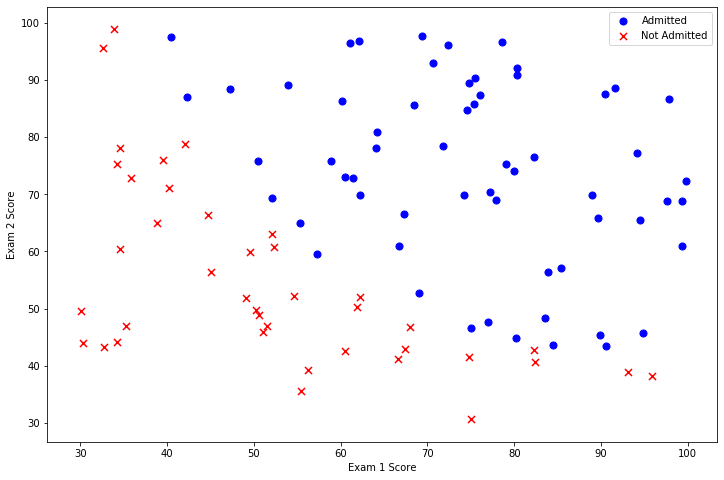

In [2]:
positive = data[data['Admitted']==1]
negative = data[data['Admitted']==0]
fig, ax = plt.subplots(figsize=(12,8))
ax.scatter(positive['Exam 1'], positive['Exam 2'], s=50, c='b', marker='o', label='Admitted')
ax.scatter(negative['Exam 1'], negative['Exam 2'], s=50, c='r', marker='x', label='Not Admitted')
ax.legend()
ax.set_xlabel('Exam 1 Score')
ax.set_ylabel('Exam 2 Score')
plt.show()

In [3]:
X=np.mat(data.iloc[:,:-1])
y=data.iloc[:,-1]
theta=np.zeros(X.shape[1])

In [4]:
def sigmoid(z):
    return 1/(1+np.exp(-z))

def  cost(theta,X,y):
    y=np.mat(y).reshape(-1,1)
    theta=np.mat(theta).reshape(X.shape[1],-1)
    h=sigmoid(X@theta)
    return (-y.T@np.log(h)-(1-y).T@(np.log(1-h)))/len(X)

def gradient(theta,X,y):
    y=np.mat(y).reshape(-1,1)
    theta=np.mat(theta).reshape(X.shape[1],-1)
    return (sigmoid(X@theta)-y).T@X/len(X)

In [5]:
cost(theta,X,y)

matrix([[0.69314718]])

In [6]:
gradient(theta,X,y)

matrix([[ -0.1       , -12.00921659, -11.26284221]])

In [7]:
import scipy.optimize as opt
result = opt.fmin_tnc(func=cost, x0=theta, fprime=gradient, args=(X,y))#注意这里的x0, arg等参数都是array-like ，秩为1的matrix都会被转化为（1，n）形式
result

(array([-25.16131867,   0.20623159,   0.20147149]), 36, 0)

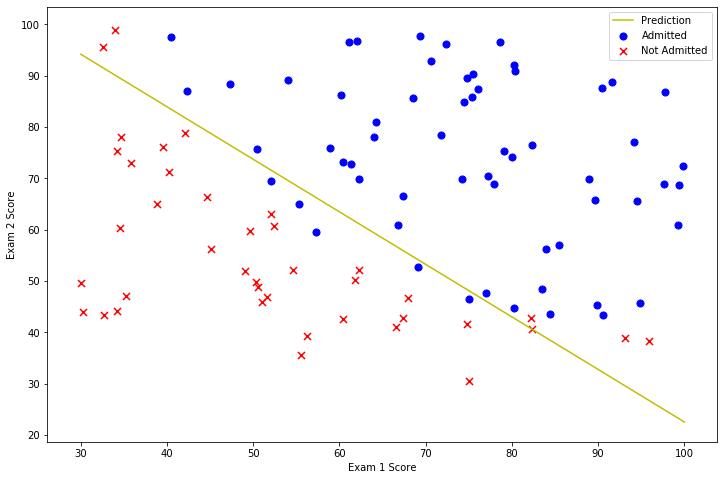

In [8]:
plotting_x1 = np.linspace(30, 100, 100)
plotting_h1 = ( - result[0][0] - result[0][1] * plotting_x1) / result[0][2]

fig, ax = plt.subplots(figsize=(12,8))
ax.plot(plotting_x1, plotting_h1, 'y', label='Prediction')
ax.scatter(positive['Exam 1'], positive['Exam 2'], s=50, c='b', marker='o', label='Admitted')
ax.scatter(negative['Exam 1'], negative['Exam 2'], s=50, c='r', marker='x', label='Not Admitted')
ax.legend()
ax.set_xlabel('Exam 1 Score')
ax.set_ylabel('Exam 2 Score')
plt.show()

In [9]:
def prediction(theta,X):
    probability = sigmoid(X * theta.T)
    return [1 if x >= 0.5 else 0 for x in probability]

In [10]:
def validation(theta,X,y):
    y=np.mat(y).T
    theta=np.mat(theta)
    return 1-np.sum(abs(y.T-prediction(theta,X)))/len(X)

In [11]:
validation(result[0],X,y)

0.89

In [12]:
path =  'H:/吴恩达《机器学习》/andrew_ml_ex22391/ex2data2.txt'
data_init = pd.read_csv(path, header=None, names=['Test 1', 'Test 2', 'Accepted'])
data_init.head()

,Test 1,Test 2,Accepted
0,0.051267,0.69956,1
1,-0.092742,0.68494,1
2,-0.213710,0.69225,1
3,-0.375000,0.50219,1
4,-0.513250,0.46564,1


In [13]:
degree = 6
data2 = data_init.copy()
x1 = data2['Test 1']
x2 = data2['Test 2']

data2.insert(3, 'Ones', 1)

for i in range(1, degree+1):
    for j in range(0, i+1):
        data2['F' + str(i-j) + str(j)] = np.power(x1, i-j) * np.power(x2, j)
#此处原答案错误较多，已经更正

data2.drop('Test 1', axis=1, inplace=True)
data2.drop('Test 2', axis=1, inplace=True)

data2.head()

,Accepted,Ones,F10,F01,F20,F11,F02,F30,F21,F12,...,F23,F14,F05,F60,F51,F42,F33,F24,F15,F06
0,1,1,0.051267,0.69956,0.002628,0.035864,0.489384,0.000135,0.001839,0.025089,...,0.000900,0.012278,0.167542,1.815630e-08,2.477505e-07,0.000003,0.000046,0.000629,0.008589,0.117206
1,1,1,-0.092742,0.68494,0.008601,-0.063523,0.469143,-0.000798,0.005891,-0.043509,...,0.002764,-0.020412,0.150752,6.362953e-07,-4.699318e-06,0.000035,-0.000256,0.001893,-0.013981,0.103256
2,1,1,-0.213710,0.69225,0.045672,-0.147941,0.479210,-0.009761,0.031616,-0.102412,...,0.015151,-0.049077,0.158970,9.526844e-05,-3.085938e-04,0.001000,-0.003238,0.010488,-0.033973,0.110047
3,1,1,-0.375000,0.50219,0.140625,-0.188321,0.252195,-0.052734,0.070620,-0.094573,...,0.017810,-0.023851,0.031940,2.780914e-03,-3.724126e-03,0.004987,-0.006679,0.008944,-0.011978,0.016040
4,1,1,-0.513250,0.46564,0.263426,-0.238990,0.216821,-0.135203,0.122661,-0.111283,...,0.026596,-0.024128,0.021890,1.827990e-02,-1.658422e-02,0.015046,-0.013650,0.012384,-0.011235,0.010193


In [14]:
def costReg(theta, X, y, learningRate):
    theta = np.matrix(theta)
    X = np.matrix(X)
    y = np.matrix(y)
    theta1=theta[:,1:]
    reg = (learningRate / (2 * len(X))) * (theta1@theta1.T)
    return cost(theta, X, y)+ reg

def gradientReg(theta, X, y, learningRate):
    theta = np.matrix(theta)
    X = np.matrix(X)
    y = np.matrix(y)
    grad= np.zeros(theta.shape[1])
    grad=gradient(theta, X, y)+learningRate*(theta)/(len(X))
    grad[0,0]=gradient(theta, X, y)[0,0]
    return grad

In [15]:
cols = data2.shape[1]
X2 = data2.iloc[:,1:cols]
y2 = data2.iloc[:,0:1]
theta2 = np.zeros(X2.shape[1])

# 进行类型转换
X2 = np.array(X2.values)
y2 = np.array(y2.values)

# λ设为1
learningRate = 1

In [16]:
costReg(theta2, X2, y2, learningRate)

matrix([[0.69314718]])

In [17]:
gradientReg(theta2, X2, y2, learningRate)

matrix([[8.47457627e-03, 1.87880932e-02, 7.77711864e-05, 5.03446395e-02,
         1.15013308e-02, 3.76648474e-02, 1.83559872e-02, 7.32393391e-03,
         8.19244468e-03, 2.34764889e-02, 3.93486234e-02, 2.23923907e-03,
         1.28600503e-02, 3.09593720e-03, 3.93028171e-02, 1.99707467e-02,
         4.32983232e-03, 3.38643902e-03, 5.83822078e-03, 4.47629067e-03,
         3.10079849e-02, 3.10312442e-02, 1.09740238e-03, 6.31570797e-03,
         4.08503006e-04, 7.26504316e-03, 1.37646175e-03, 3.87936363e-02]])

In [18]:
result2 = opt.fmin_tnc(func=costReg, x0=theta2, fprime=gradientReg, args=(X2, y2, learningRate))
print(result2)

theta_min = np.matrix(result2[0])
predictions = prediction(theta_min, X2)
correct = [1 if ((a == 1 and b == 1) or (a == 0 and b == 0)) else 0 for (a, b) in zip(predictions, y2)]
accuracy = (sum(map(int, correct)) % len(correct))
print ('accuracy = {0}%'.format(accuracy))

(array([ 1.27271027,  0.62529965,  1.18111686, -2.01987401, -0.91743187,
       -1.4316693 ,  0.12393227, -0.36553118, -0.35725405, -0.17516292,
       -1.4581701 , -0.05098418, -0.61558559, -0.27469166, -1.19271298,
       -0.2421784 , -0.20603303, -0.04466177, -0.27778947, -0.29539514,
       -0.45645982, -1.04319153,  0.02779373, -0.29244862,  0.01555758,
       -0.32742403, -0.14389149, -0.92467488]), 32, 1)
accuracy = 98%


In [19]:
validation(result2[0], X2, y2)

-58.152542372881356

In [20]:
positive2 = data_init[data_init['Accepted'].isin([1])]
negative2 = data_init[data_init['Accepted'].isin([0])]

In [21]:
def hfunc2(theta, x1, x2):
    temp = theta[0][0]
    place = 0
    for i in range(1, degree+1):
        for j in range(0, i+1):
            temp+= np.power(x1, i-j) * np.power(x2, j) * theta[0][place+1]
            place+=1
    return temp

In [22]:
def find_decision_boundary(theta):
    t1 = np.linspace(-1, 1.5, 1000)
    t2 = np.linspace(-1, 1.5, 1000)

    cordinates = [(x, y) for x in t1 for y in t2]
    x_cord, y_cord = zip(*cordinates)
    h_val = pd.DataFrame({'x1':x_cord, 'x2':y_cord})
    h_val['hval'] = hfunc2(theta, h_val['x1'], h_val['x2'])

    decision = h_val[np.abs(h_val['hval']) < 2 * 10**-3]
    return decision.x1, decision.x2

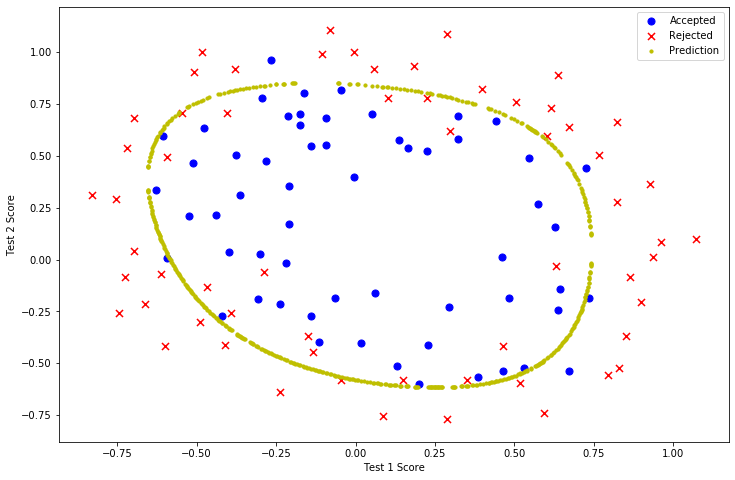

In [23]:
fig, ax = plt.subplots(figsize=(12,8))
ax.scatter(positive2['Test 1'], positive2['Test 2'], s=50, c='b', marker='o', label='Accepted')
ax.scatter(negative2['Test 1'], negative2['Test 2'], s=50, c='r', marker='x', label='Rejected')
ax.set_xlabel('Test 1 Score')
ax.set_ylabel('Test 2 Score')

x, y = find_decision_boundary(result2)
plt.scatter(x, y, c='y', s=10, label='Prediction')
ax.legend()
plt.show()